# 1. Web Scraping:

In [1]:
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

In [3]:
# Setup Chrome options
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [4]:
# Initialize driver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

In [5]:
# URL
url = "https://www.flipkart.com/all/~cs-1b320ac564382f7dc1e4d83fce7b7dce/pr?sid=0pm,0o7,2to,ict&marketplace=FLIPKART&restrictLocale=true"
driver.get(url)

In [6]:
# Lists to hold scraped data
product_names = []
product_prices = []
product_discounts = []
product_ratings = []
product_reviews = []

In [7]:
# number of pages to scrape
num_pages = 100

In [8]:
for page in range(num_pages):
    time.sleep(3)
    
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    products = soup.find_all('div', class_='cPHDOP col-12-12')

    for product in products:
        # Name
        name = product.find('a', class_='wjcEIp')
        product_names.append(name.get_text(strip=True) if name else None)

        # Price
        price = product.find('div', class_='Nx9bqj')
        product_prices.append(price.get_text(strip=True) if price else None)

        # Discount
        discount = product.find('div', class_='UkUFwK')
        product_discounts.append(discount.get_text(strip=True) if discount else None)

        # Rating
        rating = product.find('div', class_='XQDdHH')
        product_ratings.append(rating.get_text(strip=True) if rating else None)

        # Number of Reviews
        reviews = product.find('span', class_='Wphh3N')
        product_reviews.append(reviews.get_text(strip=True) if reviews else None)

    # Move to next page
    try:
        next_button = driver.find_element("xpath", '//span[text()="Next"]')
        driver.execute_script("arguments[0].click();", next_button)
    except Exception as e:
        print(f"No more pages or error clicking 'Next': {e}")
        break

# Closing browser
driver.quit()


In [9]:
# Dataframe
df = pd.DataFrame({
    'Product Name': product_names,
    'Price': product_prices,
    'Discount': product_discounts,
    'Rating': product_ratings,
    'Number of Reviews': product_reviews
})

In [10]:
# Saving file as CSV
df.to_csv('Flipkart_home_theatres_001.csv', index=False)

# sample
print(df.head())

                                        Product Name   Price Discount Rating  \
0                                               None    None     None   None   
1    PHILIPS MMS2625B/94 31 W Bluetooth Home Theatre  ₹2,999  45% off    4.2   
2  KRISONS Beatz With FM,USB,Aux and Bluettot wit...  ₹1,626  67% off    3.6   
3  Zinitax Home DJ Tower Speaker System With 5.0 ...  ₹2,138  46% off    3.7   
4  ME&U partymatepro TWS 8 hours play time FM USB...  ₹1,376  72% off    3.8   

  Number of Reviews  
0              None  
1          (45,812)  
2           (1,829)  
3              (28)  
4           (2,436)  


# 2. Data Cleaning:

In [11]:
import pandas as pd

# Load the CSV
df = pd.read_csv('Flipkart_home_theatres_Copy.csv')

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product Name       1000 non-null   object 
 1   Price              1000 non-null   object 
 2   Discount           1000 non-null   object 
 3   Rating             993 non-null    float64
 4   Number of Reviews  993 non-null    object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB
None


In [14]:
# count missing values

print("Missing values:\n", df.isnull().sum())

# drop rows where product name is missing 

df = df.dropna(subset=['Product Name'])

# fill missing values in numerical-like fields with placeholder or median 

df['Price'] = df['Price'].fillna('₹0')
df['Discount'] = df['Discount'].fillna('0% Off')
df['Rating'] = df['Rating'].fillna('0')
df['Number of Reviews'] = df['Number of Reviews'].fillna('0')


Missing values:
 Product Name         0
Price                0
Discount             0
Rating               0
Number of Reviews    0
dtype: int64


In [15]:
# Check for duplicates

print("Duplicates:", df.duplicated().sum())

# remove duplicates

df = df.drop_duplicates()


Duplicates: 752


# Standardize Formats

In [16]:
# Price – convert ₹ string to numeric

df['Price'] = df['Price'].str.replace('₹','').str.replace(',','').astype(int)

In [17]:
# Discount – extract only numbers

df['Discount'] = df['Discount'].astype(str).str.extract('(\d+)').fillna(0).astype(int)


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Makesh\AppData\Local\Temp\ipykernel_17192\2569982596.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['Discount'] = df['Discount'].astype(str).str.extract('(\d+)').fillna(0).astype(int)


In [18]:
# Rating – convert to float

df['Rating'] = df['Rating'].astype(float)

In [19]:
# Number of Reviews – extract digits

df['Number of Reviews'] = df['Number of Reviews'].str.replace('[^0-9]', '', regex=True).astype(int)


In [20]:
# Text Cleaning 

df['Product Name'] = df['Product Name'].str.title()

# Exploratory Data Analysis (EDA)

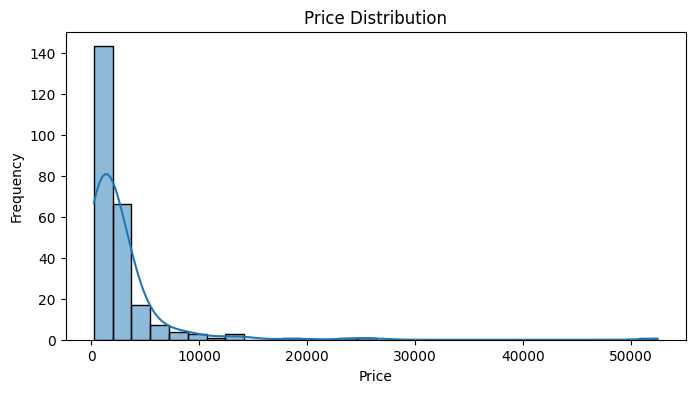

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# prices distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


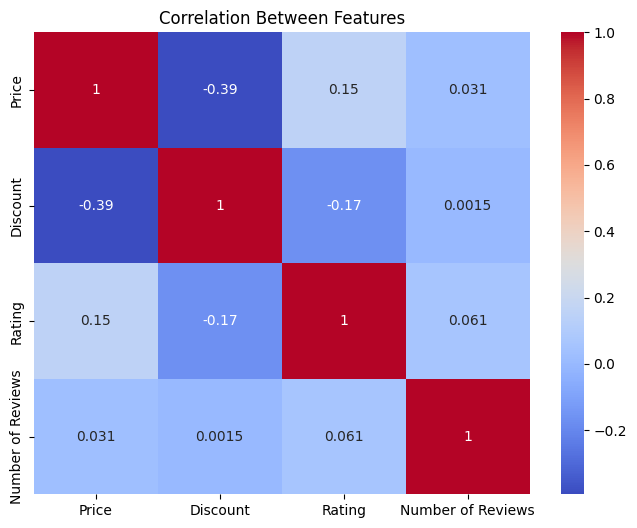

In [22]:
# Correlation between features (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Price', 'Discount', 'Rating', 'Number of Reviews']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Features")
plt.show()

C:\Users\Makesh\AppData\Local\Temp\ipykernel_17192\3203921887.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Product Name', data=top_rated, palette='crest')


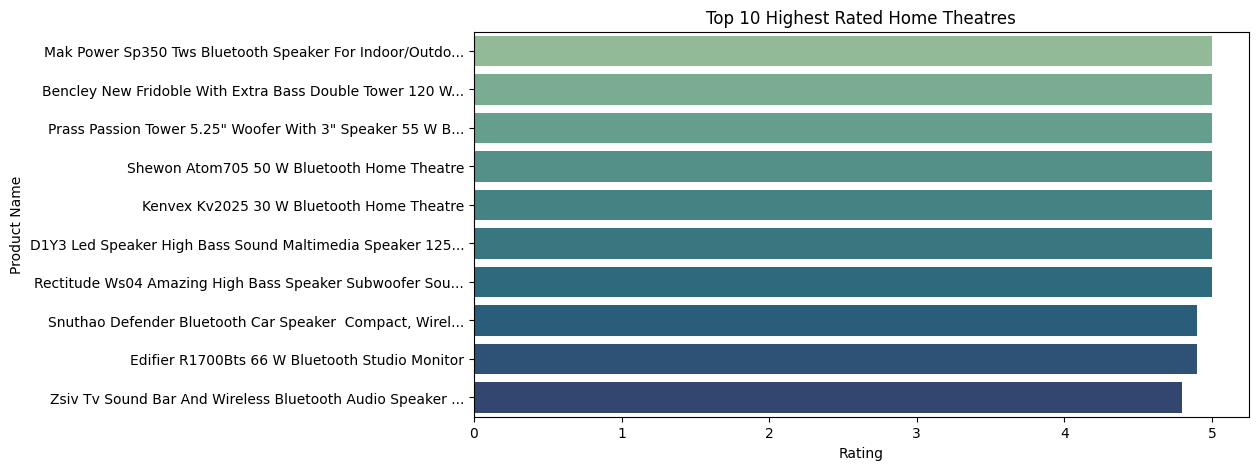

In [23]:
# Top 10 Products with Highest Ratings
top_rated = df[df['Rating'] > 0].sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='Rating', y='Product Name', data=top_rated, palette='crest')
plt.title("Top 10 Highest Rated Home Theatres")
plt.xlabel("Rating")
plt.ylabel("Product Name")
plt.show()

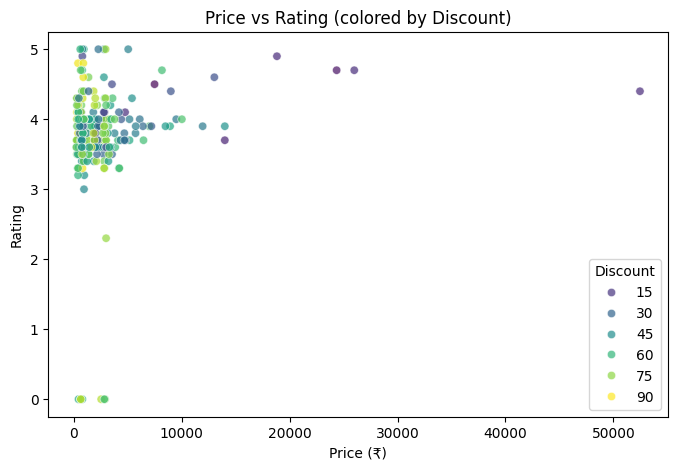

In [24]:
# Scatter Plot for Price vs Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Price', y='Rating', data=df, hue='Discount', palette='viridis', alpha=0.7)
plt.title("Price vs Rating (colored by Discount)")
plt.xlabel("Price (₹)")
plt.ylabel("Rating")
plt.show()

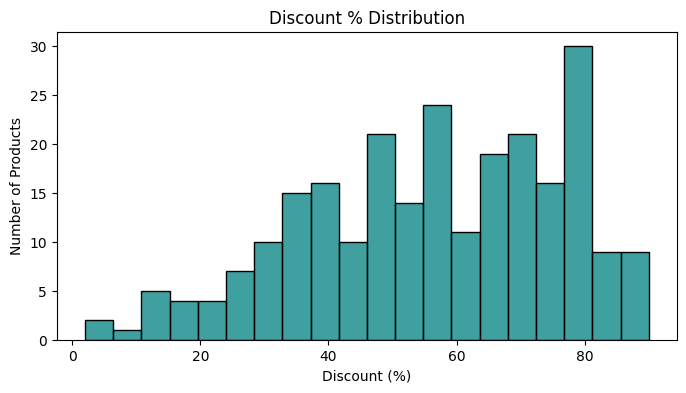

In [25]:
# Discount Distribution 
plt.figure(figsize=(8, 4))
sns.histplot(df['Discount'], bins=20, kde=False, color='teal')
plt.title("Discount % Distribution")
plt.xlabel("Discount (%)")
plt.ylabel("Number of Products")
plt.show()

C:\Users\Makesh\AppData\Local\Temp\ipykernel_17192\1911659845.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Reviews', y='Product Name', data=most_reviewed, palette='flare')


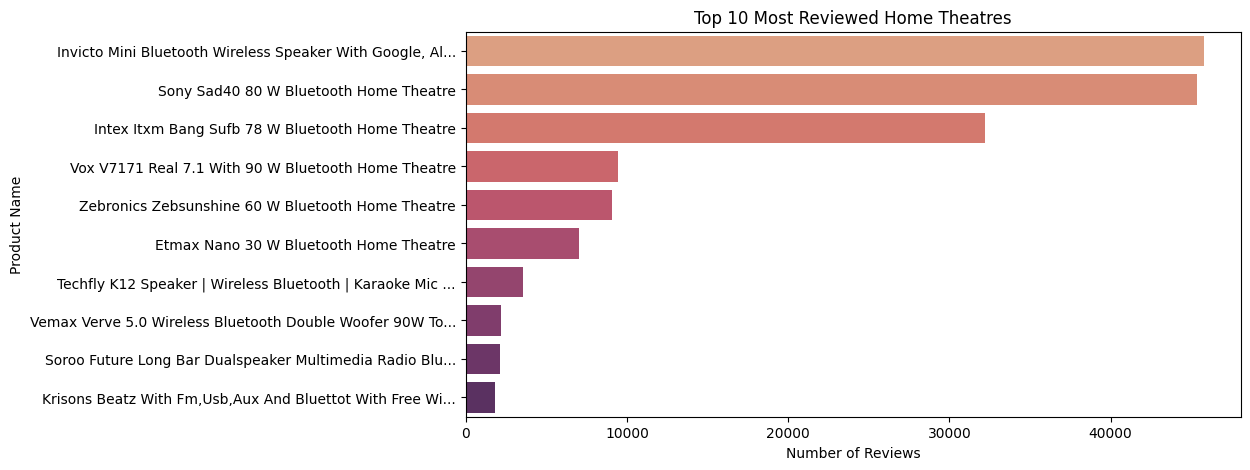

In [26]:
# Top 10 Products with Most Reviews

most_reviewed = df.sort_values(by='Number of Reviews', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='Number of Reviews', y='Product Name', data=most_reviewed, palette='flare')
plt.title("Top 10 Most Reviewed Home Theatres")
plt.xlabel("Number of Reviews")
plt.ylabel("Product Name")
plt.show()

In [27]:
# Save Cleaned Data

df.to_csv('cleaned_flipkart_home_theatres_og_copy.csv', index=False)

In [28]:
df1 = pd.read_csv('cleaned_flipkart_home_theatres_og_copy.csv')
df1

,Product Name,Price,Discount,Rating,Number of Reviews
0,Soroo Future Long Bar Dualspeaker Multimedia R...,813,88,3.9,2128
1,"Krisons Beatz With Fm,Usb,Aux And Bluettot Wit...",1619,67,3.6,1796
2,Etmax Nano 30 W Bluetooth Home Theatre,965,56,3.9,7048
3,Zebronics Zebsunshine 60 W Bluetooth Home Theatre,2299,34,3.7,9082
4,World Voice Red Nano Xl 160 W Bluetooth Home A...,972,48,3.6,955
...,...,...,...,...,...
243,Guggu Dj Box Wireless Small With Big Sound Met...,425,57,4.0,10
244,Techobucks 3D Rich Bass Multimedia Trolley Dis...,405,66,3.3,12
245,Rzw Bass 20W Bluetooth Speaker With 12Hour Pla...,781,77,3.5,11
246,Clairbell Nej_633G_Lz 4104||Ws04|| Karaoke Spe...,746,46,3.6,17
